# This notebook contains the code used to create all of the plots in my paper

In [2]:
# Importing necessary packages
import sys
sys.path.append('/home/yja6qa/arepo_package/')

import arepo_package
import scipy.interpolate
import h5py
import os
import numpy as np
import plotting
from brahma_analysis_clean import *
from sklearn.linear_model import LinearRegression

%matplotlib inline

h = 0.6774

# Loading in data:

## Here are several relations and data points grabbed from other papers

In [3]:
# https://ui.adsabs.harvard.edu/abs/2013ARA%26A..51..511K/abstract
Korm_Ho_2013=np.array([1.7222222222222223, 5.980392156862745,1.8611111111111112, 6.568627450980392,1.9801587301587302, 7.098039215686274,2.0912698412698414, 7.568627450980392,2.1666666666666665, 7.901960784313726,2.253968253968254, 8.294117647058824,2.365079365079365, 8.784313725490197,2.492063492063492, 9.333333333333334,2.575396825396825, 9.686274509803923])

model=LinearRegression()

KH13_x = list(np.arange(0,len(Korm_Ho_2013)-2,2))
KH13_y=list(np.arange(1,len(Korm_Ho_2013)-1,2))

modelx=Korm_Ho_2013[KH13_x].reshape(-1, 1)
modely=Korm_Ho_2013[KH13_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit=np.linspace(0.75,2.5,100)
KH13_yfit=model.coef_*xfit + model.intercept_

Korm_Ho_M_Mstar=np.array([8.017615886326578, 5.212962962962962,8.274545772187281, 5.509259259259259,8.424935942231539, 5.685185185185185,8.581586303284416, 5.87037037037037,11.188358956440716, 8.916666666666666,10.724638947123225, 8.37962962962963,10.42388772420219, 8.018518518518519,9.809777544840438, 7.305555555555555,9.346057535522945, 6.768518518518518,9.045306312601909, 6.4074074074074066,8.731976473328675, 6.046296296296296,11.031679478220358, 8.74074074074074])

model=LinearRegression()

KH13_M_Mstar_x = list(np.arange(0,len(Korm_Ho_M_Mstar)-2,2))
KH13_M_Mstar_y=list(np.arange(1,len(Korm_Ho_M_Mstar)-1,2))

modelx=Korm_Ho_M_Mstar[KH13_M_Mstar_x].reshape(-1, 1)
modely=Korm_Ho_M_Mstar[KH13_M_Mstar_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit_M_Mstar=np.linspace(7,12,100)
KH13_M_Mstar_yfit=model.coef_*xfit_M_Mstar + model.intercept_

In [4]:
# https://ui.adsabs.harvard.edu/abs/2024A%26A...691A.145M/abstract
Maiolino_et_al = np.array([1.9268858800773696, 5.656560658539877,1.6406189555125728, 6.172349421978319,1.7705996131528048, 6.298367144977734,1.872727272727273, 6.564324591786245,1.7705996131528048, 7.693715982187037,1.642166344294004, 7.707210651792542,1.9067698259187622, 7.88941118258288,1.928433268858801, 7.493747469749449,1.9315280464216635, 7.284400161936036,1.9021276595744683, 7.238315865233234,1.8541586073500969, 7.2157572758760296,1.9593810444874276, 7.132832531150196,1.9500967117988397, 7.353897710404391,1.9485493230174082, 6.865548108497144,1.9222437137330757, 6.8194188295623235])

Maiolino_x = Maiolino_et_al[list(np.arange(0,len(Maiolino_et_al)-2,2))]
Maiolino_y = Maiolino_et_al[list(np.arange(1,len(Maiolino_et_al)-1,2))]


Maiolino_M_Mstar = np.array([8.884142790589332, 5.6574074074074066,8.894945259725134, 6.222222222222221,9.78185418122525, 6.185185185185185,10.177702073142324, 6.305555555555555,10.173334498020033, 7.694444444444444,10.650681341719077, 7.898148148148148,9.770760540414628, 7.712962962962963,8.878348474260424, 7.5,8.43256464011181, 7.259259259259259,8.331586303284416, 7.37037037037037,8.093058467272304, 7.222222222222221,8.048771255532262, 7.305555555555555,7.778855112974609, 7.138888888888888,7.8677789424644775, 6.861111111111111,8.113993710691824, 6.564814814814814,8.377329373398556, 6.824074074074074])

Maiolino_x_M_Mstar = Maiolino_M_Mstar[list(np.arange(0,len(Maiolino_M_Mstar)-2,2))]
Maiolino_y_M_Mstar = Maiolino_M_Mstar[list(np.arange(1,len(Maiolino_M_Mstar)-1,2))]


In [5]:
# https://ui.adsabs.harvard.edu/abs/2023ApJ...957L...3P/abstract
Pacucchi_et_al = np.array([7.466494845360824, 5.523809523809525,7.93041237113402, 6.015873015873016,8.231958762886597, 6.341269841269842,8.664948453608247, 6.801587301587302,9.11340206185567, 7.277777777777779,9.585051546391753, 7.7857142857142865,9.987113402061855, 8.214285714285715,10.38144329896907, 8.626984126984127,10.621134020618555, 8.88888888888889,10.984536082474227, 9.26984126984127])

model=LinearRegression()

Pacucchi_model_x = list(np.arange(0,len(Pacucchi_et_al)-2,2))
Pacucchi_model_y=list(np.arange(1,len(Pacucchi_et_al)-1,2))

modelx=Pacucchi_et_al[Pacucchi_model_x].reshape(-1, 1)
modely=Pacucchi_et_al[Pacucchi_model_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit_Pacucchi=np.linspace(5,12,100)
Pacucchi_yfit=model.coef_*xfit_Pacucchi + model.intercept_

## Loading in BRAHMA data:

In [6]:
bFOF_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_z0_decomp')
bFOF_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_z1_decomp')
bFOF_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_z2_decomp')
bFOF_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_z3_decomp')
bFOF_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_z4_decomp')
bFOF_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_z5_decomp')
bFOF_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_z6_decomp')
bFOF_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_z7_decomp')

LW10_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z0_decomp')
LW10_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z1_decomp')
LW10_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z2_decomp')
LW10_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z3_decomp')
LW10_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z4_decomp')
LW10_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z5_decomp')
LW10_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z6_decomp')
LW10_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z7_decomp')

spin_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z0_decomp')
spin_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z1_decomp')
spin_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z2_decomp')
spin_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z3_decomp')
spin_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z4_decomp')
spin_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z5_decomp')
spin_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z6_decomp')
spin_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z7_decomp')

rich_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z0_decomp')
rich_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z1_decomp')
rich_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z2_decomp')
rich_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z3_decomp')
rich_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z4_decomp')
rich_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z5_decomp')
rich_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z6_decomp')
rich_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z7_decomp')

In [7]:
# Storing the BH masses
MBH_decomp_bFOFz0 = np.array(bFOF_decomp_z0[5])
MBH_decomp_bFOFz1 = np.array(bFOF_decomp_z1[5])
MBH_decomp_bFOFz2 = np.array(bFOF_decomp_z2[5])
MBH_decomp_bFOFz3 = np.array(bFOF_decomp_z3[5])
MBH_decomp_bFOFz4 = np.array(bFOF_decomp_z4[5])
MBH_decomp_bFOFz5 = np.array(bFOF_decomp_z5[5])
MBH_decomp_bFOFz6 = np.array(bFOF_decomp_z6[5])
MBH_decomp_bFOFz7 = np.array(bFOF_decomp_z7[5])

MBH_decomp_LW10z0 = np.array(LW10_decomp_z0[5])
MBH_decomp_LW10z1 = np.array(LW10_decomp_z1[5])
MBH_decomp_LW10z2 = np.array(LW10_decomp_z2[5])
MBH_decomp_LW10z3 = np.array(LW10_decomp_z3[5])
MBH_decomp_LW10z4 = np.array(LW10_decomp_z4[5])
MBH_decomp_LW10z5 = np.array(LW10_decomp_z5[5])
MBH_decomp_LW10z6 = np.array(LW10_decomp_z6[5])
MBH_decomp_LW10z7 = np.array(LW10_decomp_z7[5])

MBH_decomp_spinz0 = np.array(spin_decomp_z0[5])
MBH_decomp_spinz1 = np.array(spin_decomp_z1[5])
MBH_decomp_spinz2 = np.array(spin_decomp_z2[5])
MBH_decomp_spinz3 = np.array(spin_decomp_z3[5])
MBH_decomp_spinz4 = np.array(spin_decomp_z4[5])
MBH_decomp_spinz5 = np.array(spin_decomp_z5[5])
MBH_decomp_spinz6 = np.array(spin_decomp_z6[5])
MBH_decomp_spinz7 = np.array(spin_decomp_z7[5])

MBH_decomp_richz0 = np.array(rich_decomp_z0[5])
MBH_decomp_richz1 = np.array(rich_decomp_z1[5])
MBH_decomp_richz2 = np.array(rich_decomp_z2[5])
MBH_decomp_richz3 = np.array(rich_decomp_z3[5])
MBH_decomp_richz4 = np.array(rich_decomp_z4[5])
MBH_decomp_richz5 = np.array(rich_decomp_z5[5])
MBH_decomp_richz6 = np.array(rich_decomp_z6[5])
MBH_decomp_richz7 = np.array(rich_decomp_z7[5])

In [8]:
# Storing the stellar masses
Mstar_decomp_bFOFz0 = np.array(bFOF_decomp_z0[6])
Mstar_decomp_bFOFz1 = np.array(bFOF_decomp_z1[6])
Mstar_decomp_bFOFz2 = np.array(bFOF_decomp_z2[6])
Mstar_decomp_bFOFz3 = np.array(bFOF_decomp_z3[6])
Mstar_decomp_bFOFz4 = np.array(bFOF_decomp_z4[6])
Mstar_decomp_bFOFz5 = np.array(bFOF_decomp_z5[6])
Mstar_decomp_bFOFz6 = np.array(bFOF_decomp_z6[6])
Mstar_decomp_bFOFz7 = np.array(bFOF_decomp_z7[6])

Mstar_decomp_LW10z0 = np.array(LW10_decomp_z0[6])
Mstar_decomp_LW10z1 = np.array(LW10_decomp_z1[6])
Mstar_decomp_LW10z2 = np.array(LW10_decomp_z2[6])
Mstar_decomp_LW10z3 = np.array(LW10_decomp_z3[6])
Mstar_decomp_LW10z4 = np.array(LW10_decomp_z4[6])
Mstar_decomp_LW10z5 = np.array(LW10_decomp_z5[6])
Mstar_decomp_LW10z6 = np.array(LW10_decomp_z6[6])
Mstar_decomp_LW10z7 = np.array(LW10_decomp_z7[6])

Mstar_decomp_spinz0 = np.array(spin_decomp_z0[6])
Mstar_decomp_spinz1 = np.array(spin_decomp_z1[6])
Mstar_decomp_spinz2 = np.array(spin_decomp_z2[6])
Mstar_decomp_spinz3 = np.array(spin_decomp_z3[6])
Mstar_decomp_spinz4 = np.array(spin_decomp_z4[6])
Mstar_decomp_spinz5 = np.array(spin_decomp_z5[6])
Mstar_decomp_spinz6 = np.array(spin_decomp_z6[6])
Mstar_decomp_spinz7 = np.array(spin_decomp_z7[6])

Mstar_decomp_richz0 = np.array(rich_decomp_z0[6])
Mstar_decomp_richz1 = np.array(rich_decomp_z1[6])
Mstar_decomp_richz2 = np.array(rich_decomp_z2[6])
Mstar_decomp_richz3 = np.array(rich_decomp_z3[6])
Mstar_decomp_richz4 = np.array(rich_decomp_z4[6])
Mstar_decomp_richz5 = np.array(rich_decomp_z5[6])
Mstar_decomp_richz6 = np.array(rich_decomp_z6[6])
Mstar_decomp_richz7 = np.array(rich_decomp_z7[6])

In [9]:
# Storing the bulge sigma's
Sigma_bulge_bFOFz0 = np.linalg.norm(bFOF_decomp_z0[1],axis=1)
Sigma_bulge_bFOFz1 = np.linalg.norm(bFOF_decomp_z1[1],axis=1)
Sigma_bulge_bFOFz2 = np.linalg.norm(bFOF_decomp_z2[1],axis=1)
Sigma_bulge_bFOFz3 = np.linalg.norm(bFOF_decomp_z3[1],axis=1)
Sigma_bulge_bFOFz4 = np.linalg.norm(bFOF_decomp_z4[1],axis=1)
Sigma_bulge_bFOFz5 = np.linalg.norm(bFOF_decomp_z5[1],axis=1)
Sigma_bulge_bFOFz6 = np.linalg.norm(bFOF_decomp_z6[1],axis=1)
Sigma_bulge_bFOFz7 = np.linalg.norm(bFOF_decomp_z7[1],axis=1)

Sigma_bulge_LW10z0 = np.linalg.norm(LW10_decomp_z0[1],axis=1)
Sigma_bulge_LW10z1 = np.linalg.norm(LW10_decomp_z1[1],axis=1)
Sigma_bulge_LW10z2 = np.linalg.norm(LW10_decomp_z2[1],axis=1)
Sigma_bulge_LW10z3 = np.linalg.norm(LW10_decomp_z3[1],axis=1)
Sigma_bulge_LW10z4 = np.linalg.norm(LW10_decomp_z4[1],axis=1)
Sigma_bulge_LW10z5 = np.linalg.norm(LW10_decomp_z5[1],axis=1)
Sigma_bulge_LW10z6 = np.linalg.norm(LW10_decomp_z6[1],axis=1)
Sigma_bulge_LW10z7 = np.linalg.norm(LW10_decomp_z7[1],axis=1)

Sigma_bulge_spinz0 = np.linalg.norm(spin_decomp_z0[1],axis=1)
Sigma_bulge_spinz1 = np.linalg.norm(spin_decomp_z1[1],axis=1)
Sigma_bulge_spinz2 = np.linalg.norm(spin_decomp_z2[1],axis=1)
Sigma_bulge_spinz3 = np.linalg.norm(spin_decomp_z3[1],axis=1)
Sigma_bulge_spinz4 = np.linalg.norm(spin_decomp_z4[1],axis=1)
Sigma_bulge_spinz5 = np.linalg.norm(spin_decomp_z5[1],axis=1)
Sigma_bulge_spinz6 = np.linalg.norm(spin_decomp_z6[1],axis=1)
Sigma_bulge_spinz7 = np.linalg.norm(spin_decomp_z7[1],axis=1)

Sigma_bulge_richz0 = np.linalg.norm(rich_decomp_z0[1],axis=1)
Sigma_bulge_richz1 = np.linalg.norm(rich_decomp_z1[1],axis=1)
Sigma_bulge_richz2 = np.linalg.norm(rich_decomp_z2[1],axis=1)
Sigma_bulge_richz3 = np.linalg.norm(rich_decomp_z3[1],axis=1)
Sigma_bulge_richz4 = np.linalg.norm(rich_decomp_z4[1],axis=1)
Sigma_bulge_richz5 = np.linalg.norm(rich_decomp_z5[1],axis=1)
Sigma_bulge_richz6 = np.linalg.norm(rich_decomp_z6[1],axis=1)
Sigma_bulge_richz7 = np.linalg.norm(rich_decomp_z7[1],axis=1)

## Loading in Illustris/IllustrisTNG data:

In [ ]:
# Illustris and TNG 
Illz0=ReadBrahmaData('Brahma_Data/Illustris_z0')
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

Illz5=ReadBrahmaData('Brahma_Data/Illustris_z5')
TNGz5=ReadBrahmaData('Brahma_Data/TNG_z5')

In [ ]:
Sigma_Illz0 = np.array(Illz0[4])[:,0]
Sigma_TNGz0 = np.array(TNGz0[4])[:,0]
Sigma_Illz5 = np.array(Illz5[4])[:,0]
Sigma_TNGz5 = np.array(TNGz5[4])[:,0]

MStar_Illz0 = [np.sum(Illz0[2][i]) for i in range(len(Illz0[2]))]
MStar_TNgz0 = [np.sum(TNGz0[2][i]) for i in range(len(TNGz0[2]))]
MStar_Illz5 = [np.sum(Illz5[2][i]) for i in range(len(Illz5[2]))]
MStar_TNGz5 = [np.sum(TNGz5[2][i]) for i in range(len(TNGz5[2]))]

# BH number density plot

In [8]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_' # Base name included in every box
box='bFOF'
basePath = path_to_output+run+output+box # Combining paths to read data in 
desired_redshift = 0
file_format='fof_subfind'

output_redshift,output_snapshot=arepo_package.desired_redshift_to_output_redshift(basePath,
                                                                    desired_redshift,list_all=False,file_format=file_format)
hdr  = il.groupcat.loadHeader(basePath, output_snapshot)
h = hdr['HubbleParam'] ## load in h from the header
box_size = hdr['BoxSize']

In [9]:
# Setting path and constants for this job
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_' # Base name included in every box

# A few settings/constants:
kpc2km=3.0857e16 # Conversion from kpc to km for units

# Change these!
boxes = ['bFOF','bFOF_LW10','bFOF_LW10_spin','bFOF_LW10_spin_rich'] # Name of the box we want to load data from
desired_redshifts=np.arange(30) # Redshift of box that I want

n_BHs = {}

for box in boxes:
    basePath = path_to_output+run+output+box # Combining paths to read data in 

    n = []
    for z in desired_redshifts:
        SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',z,postprocessed=1)
        SubhaloBHLen = SubhaloLenType[:,5]
        # a = 1/(1+z)
        volume = (1e-3*box_size/h)**3 # Converting to cMpc from ckpc/h
        n.append(np.sum(SubhaloBHLen)/volume)
        
    n_BHs[box] = n

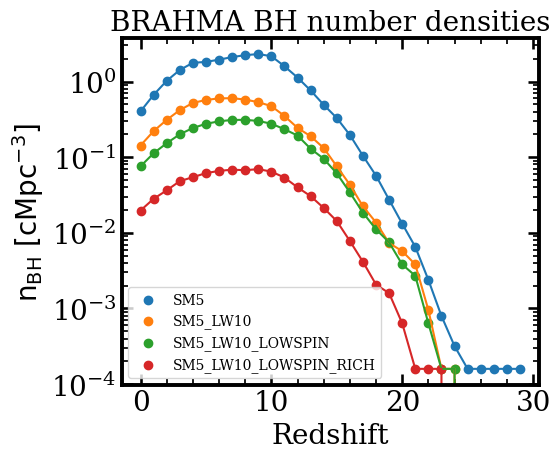

In [10]:
plt.figure(figsize=(6,5))
boxnames = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

for i in range(len(boxes)):
    plt.scatter(desired_redshifts,n_BHs[boxes[i]],label=boxnames[i])    
    plt.plot(desired_redshifts,n_BHs[boxes[i]]) 

plt.yscale('log')
plt.legend(fontsize=10)
plt.ylabel(r'$\mathrm{n_{BH}\ [cMpc^{-3}]}$')
plt.xlabel('Redshift')
plt.title('BRAHMA BH number densities',size=20)
plt.tight_layout()
plt.savefig('Plots/Brahma_BH_n.pdf',bbox_inches='tight')

# Full scatter $M_{BH}-\sigma$ and $M_{BH}-M_*$ plots

## First the $M_{BH}-M_*$ plot:

In [31]:
# List of BH Masses
Prop2list=[[np.array(MBH_decomp_bFOFz5),np.array(MBH_decomp_bFOFz0)],
          [np.array(MBH_decomp_LW10z5),np.array(MBH_decomp_LW10z0)],
           [np.array(MBH_decomp_spinz5),np.array(MBH_decomp_spinz0)],
          [np.array(MBH_decomp_richz5),np.array(MBH_decomp_richz0)],
          ]

# List of Stellar masses
Prop1list=[[np.array(Mstar_decomp_bFOFz5),np.array(Mstar_decomp_bFOFz0)],
           [np.array(Mstar_decomp_LW10z5),np.array(Mstar_decomp_LW10z0)],
           [np.array(Mstar_decomp_spinz5),np.array(Mstar_decomp_spinz0)],
           [np.array(Mstar_decomp_richz5),np.array(Mstar_decomp_richz0)]]

# Limits for making plot in log space
limitsMstar=[6.4,11.5]

In [32]:
redshifts=[5,0]
AllBoxMeans,AllBoxStdDevs,Xpoints = mean_trends_adj(Prop1list,Prop2list,redshifts,limitsMstar,bins=10)

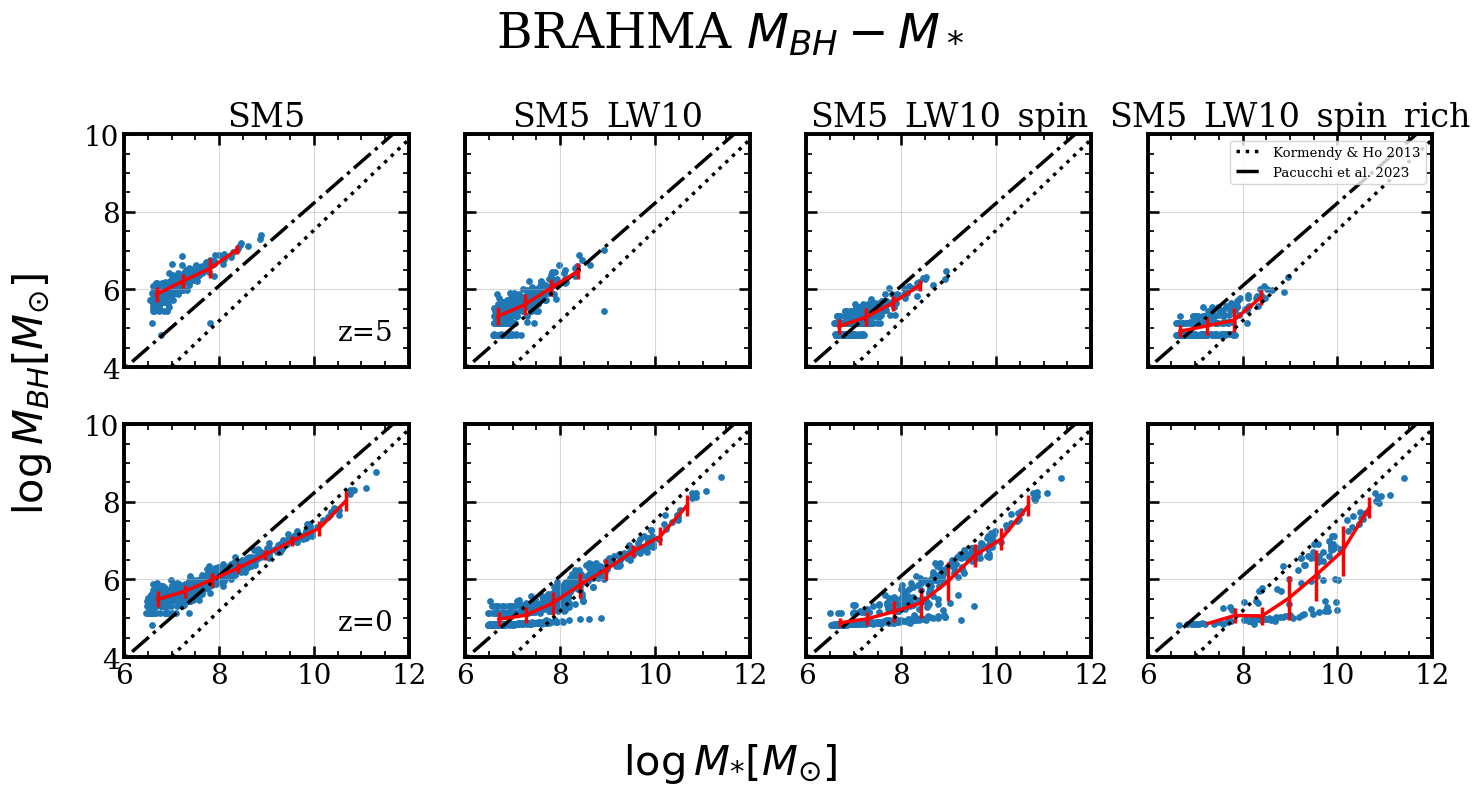

In [11]:
f,axs = plt.subplots(2,4,sharey = True,sharex = True,figsize = (15,8))

axs[0,0].scatter(np.log10(Mstar_decomp_bFOFz5),np.log10(MBH_decomp_bFOFz5),s=15)#,color='black')
axs[0,1].scatter(np.log10(Mstar_decomp_LW10z5),np.log10(MBH_decomp_LW10z5),s=15)#,color='black')
axs[0,2].scatter(np.log10(Mstar_decomp_spinz5),np.log10(MBH_decomp_spinz5),s=15)#,color='black')
axs[0,3].scatter(np.log10(Mstar_decomp_richz5),np.log10(MBH_decomp_richz5),s=15)#,color='black')

axs[0,0].set_title('SM5')
axs[0,1].set_title('SM5_LW10')
axs[0,2].set_title('SM5_LW10_spin')
axs[0,3].set_title('SM5_LW10_spin_rich')

axs[0,0].text(0.85, 0.15, 'z=5', horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes,size=20)

axs[1,0].scatter(np.log10(Mstar_decomp_bFOFz0),np.log10(MBH_decomp_bFOFz0),s=15)#,color='black')
axs[1,1].scatter(np.log10(Mstar_decomp_LW10z0),np.log10(MBH_decomp_LW10z0),s=15)#,color='black')
axs[1,2].scatter(np.log10(Mstar_decomp_spinz0),np.log10(MBH_decomp_spinz0),s=15)#,color='black')
axs[1,3].scatter(np.log10(Mstar_decomp_richz0),np.log10(MBH_decomp_richz0),s=15)#,color='black')

axs[1,0].text(0.85, 0.15, 'z=0', horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes,size=20)

f.supxlabel(r'$\log M_{*} [M_{\odot}]$',size=30)
f.supylabel(r'$\log M_{BH} [M_{\odot}]$',size=30)

for i in range(4):
    for ii in range(2):
        axs[ii,i].errorbar(Xpoints[ii],AllBoxMeans[i,ii],yerr = AllBoxStdDevs[i,ii],color='red',lw=2.5)

for ax in axs.flatten():
    ax.grid(alpha=0.5)
    ax.plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],label='Kormendy & Ho 2013',ls='dotted',lw=2.5,alpha=1,color='black')
    ax.plot(xfit_Pacucchi,Pacucchi_yfit[0],label='Pacucchi et al. 2023',ls='dashdot',lw=2.5,alpha=1,color='black')
    ax.set_xlim(6,12)
    ax.set_ylim(4,10)

axs[0,3].legend(fontsize=9.6,loc = 1)
    
f.suptitle('BRAHMA $M_{BH}-M_*$',size=35)
f.tight_layout()

plt.savefig('Plots/Brahma_MBH_Mstar_full_scatter_final.pdf')

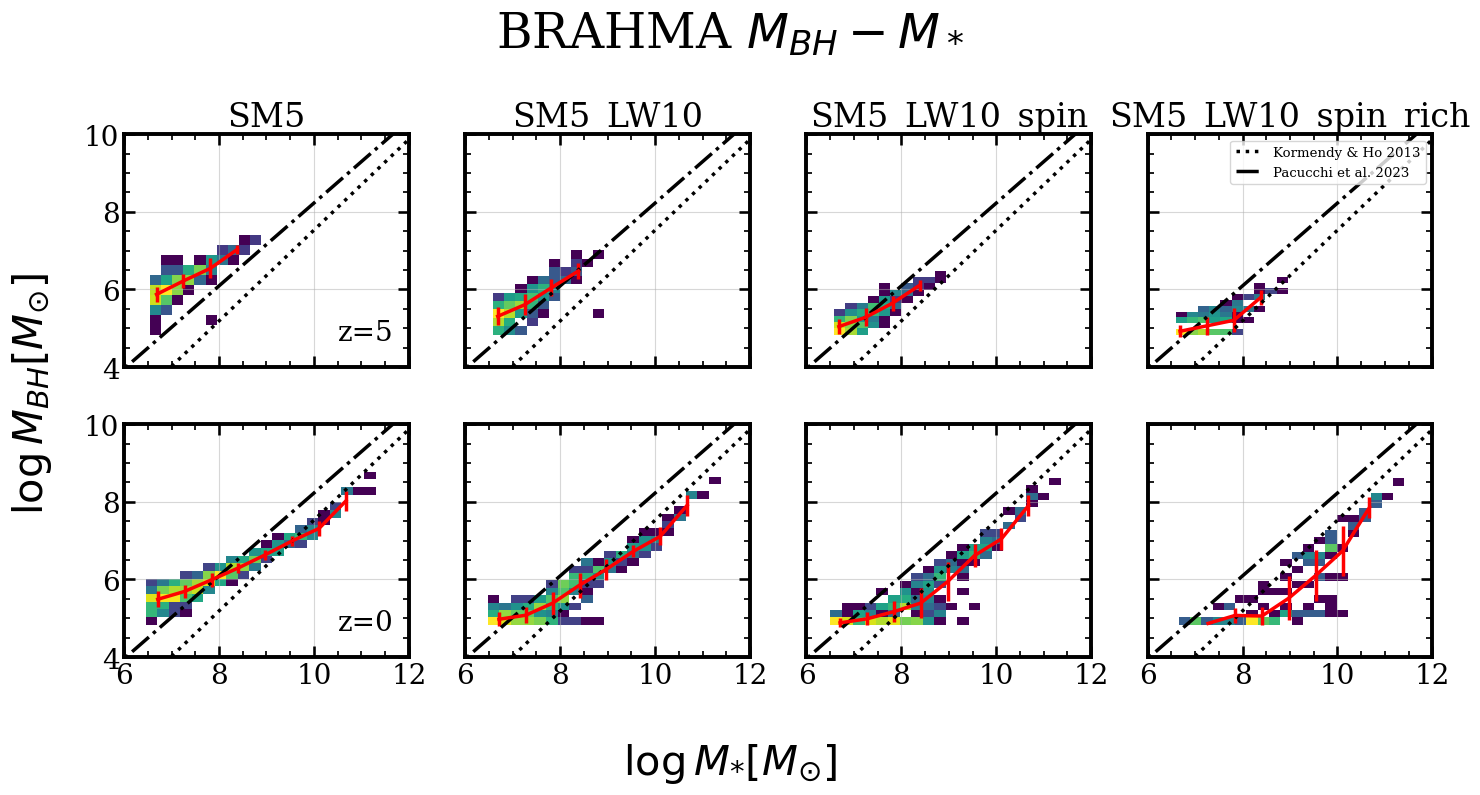

In [33]:
f,axs = plt.subplots(2,4,sharey = True,sharex = True,figsize = (15,8))

counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(np.log10(Mstar_decomp_bFOFz5),np.log10(MBH_decomp_bFOFz5),norm='log',bins=(10,10))
counts2, xedges2, yedges2, im2 = axs[0,1].hist2d(np.log10(Mstar_decomp_LW10z5),np.log10(MBH_decomp_LW10z5),norm='log',bins=(10,10))
counts3, xedges3, yedges3, im3 = axs[0,2].hist2d(np.log10(Mstar_decomp_spinz5),np.log10(MBH_decomp_spinz5),norm='log',bins=(10,10))
counts4, xedges4, yedges4, im4 = axs[0,3].hist2d(np.log10(Mstar_decomp_richz5),np.log10(MBH_decomp_richz5),norm='log',bins=(10,10))

axs[0,0].set_title('SM5')
axs[0,1].set_title('SM5_LW10')
axs[0,2].set_title('SM5_LW10_spin')
axs[0,3].set_title('SM5_LW10_spin_rich')

axs[0,0].text(0.85, 0.15, 'z=5', horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes,size=20)

counts5, xedges5, yedges5, im5 = axs[1,0].hist2d(np.log10(Mstar_decomp_bFOFz0),np.log10(MBH_decomp_bFOFz0),norm='log',bins=(20,20))
counts6, xedges6, yedges6, im6 = axs[1,1].hist2d(np.log10(Mstar_decomp_LW10z0),np.log10(MBH_decomp_LW10z0),norm='log',bins=(20,20))
counts7, xedges7, yedges7, im7 = axs[1,2].hist2d(np.log10(Mstar_decomp_spinz0),np.log10(MBH_decomp_spinz0),norm='log',bins=(20,20))
counts8, xedges8, yedges8, im8 = axs[1,3].hist2d(np.log10(Mstar_decomp_richz0),np.log10(MBH_decomp_richz0),norm='log',bins=(20,20))

axs[1,0].text(0.85, 0.15, 'z=0', horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes,size=20)

f.supxlabel(r'$\log M_{*} [M_{\odot}]$',size=30)
f.supylabel(r'$\log M_{BH} [M_{\odot}]$',size=30)

for i in range(4):
    for ii in range(2):
        axs[ii,i].errorbar(Xpoints[ii],AllBoxMeans[i,ii],yerr = AllBoxStdDevs[i,ii],color='red',lw=2.5)

for ax in axs.flatten():
    ax.grid(alpha=0.5)
    ax.plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],label='Kormendy & Ho 2013',ls='dotted',lw=2.5,alpha=1,color='black')
    ax.plot(xfit_Pacucchi,Pacucchi_yfit[0],label='Pacucchi et al. 2023',ls='dashdot',lw=2.5,alpha=1,color='black')
    ax.set_xlim(6,12)
    ax.set_ylim(4,10)

axs[0,3].legend(fontsize=9.6,loc = 1)
    
f.suptitle('BRAHMA $M_{BH}-M_*$',size=35)
f.tight_layout()

plt.savefig('Plots/Brahma_MBH_Mstar_full_scatter_final_hist2d.pdf')

## Now the $M_{BH}-\sigma$ plot:

In [55]:
# List of BH Masses
Prop2list=[[np.array(MBH_decomp_bFOFz5),np.array(MBH_decomp_bFOFz0)],
          [np.array(MBH_decomp_LW10z5),np.array(MBH_decomp_LW10z0)],
           [np.array(MBH_decomp_spinz5),np.array(MBH_decomp_spinz0)],
          [np.array(MBH_decomp_richz5),np.array(MBH_decomp_richz0)],
          ]

# List of sigmas
Prop1list=[[Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz0],
          [Sigma_bulge_LW10z5,Sigma_bulge_LW10z0],
          [Sigma_bulge_spinz5,Sigma_bulge_spinz0],
          [Sigma_bulge_richz5,Sigma_bulge_richz0]
          ]

# Limits for making plot in log space
limits=[1,2.4] # Checked min and max sigmas for BRAHMA boxes 

In [56]:
redshifts=[5,0]
AllBoxMeans,AllBoxStdDevs,Xpoints = mean_trends_adj(Prop1list,Prop2list,redshifts,limits,bins=8)

/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:156: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:157: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]


Here we divide by $\sqrt{3}$ to approximate a 1D line of sight velocity dispersion from the 3D velocity dispersion

/tmp/ipykernel_499466/3450714938.py:3: RuntimeWarning: divide by zero encountered in log10
  axs[0,0].scatter(np.log10(Sigma_bulge_bFOFz5)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_bFOFz5),s=15)#,color='black')
/tmp/ipykernel_499466/3450714938.py:4: RuntimeWarning: divide by zero encountered in log10
  axs[0,1].scatter(np.log10(Sigma_bulge_LW10z5)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_LW10z5),s=15)#,color='black')
/tmp/ipykernel_499466/3450714938.py:6: RuntimeWarning: divide by zero encountered in log10
  axs[0,3].scatter(np.log10(Sigma_bulge_richz5)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_richz5),s=15)#,color='black')


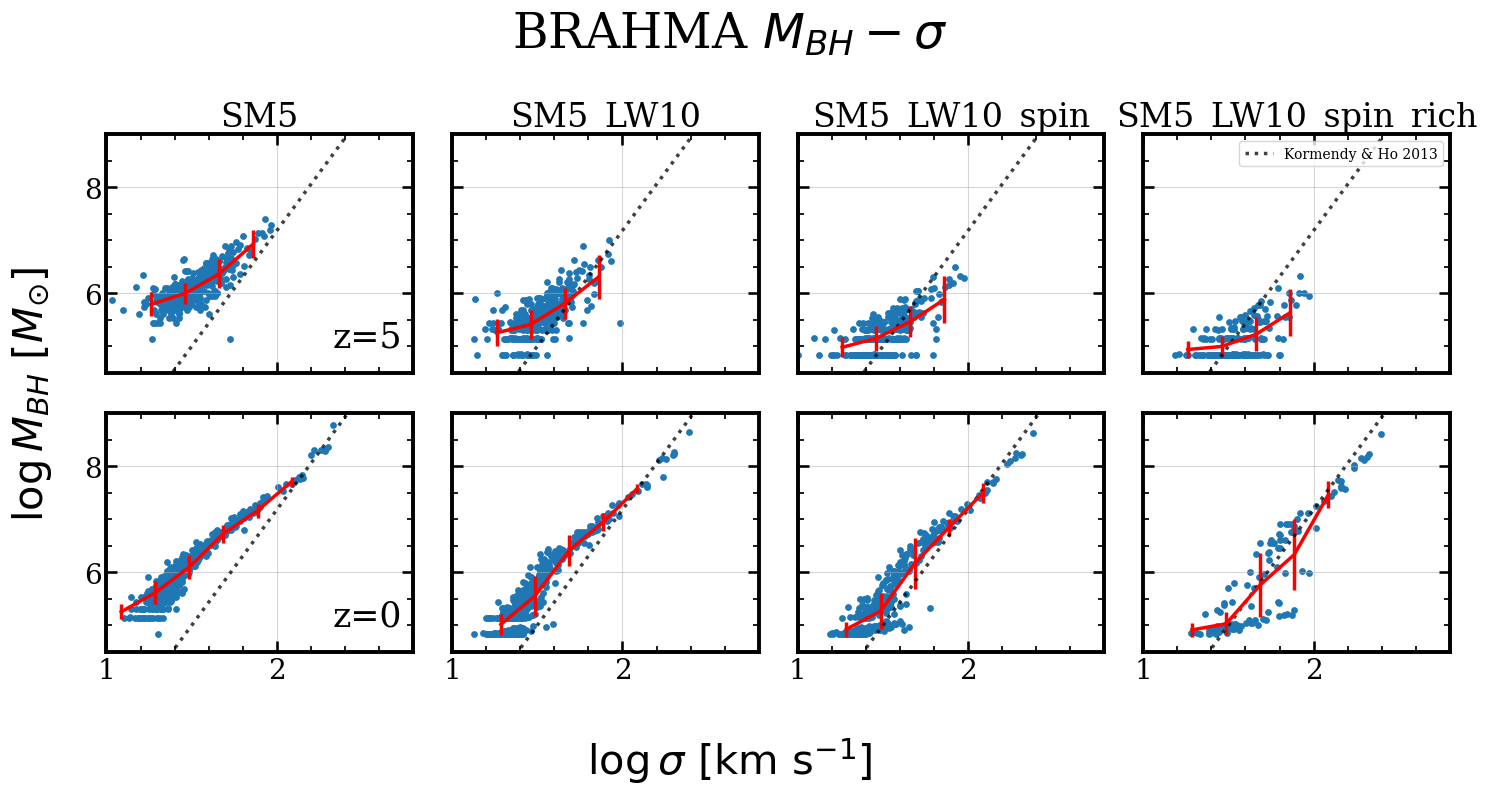

In [57]:
f,axs = plt.subplots(2,4,sharey = True,sharex = True,figsize = (15,8))

axs[0,0].scatter(np.log10(Sigma_bulge_bFOFz5)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_bFOFz5),s=15)#,color='black')
axs[0,1].scatter(np.log10(Sigma_bulge_LW10z5)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_LW10z5),s=15)#,color='black')
axs[0,2].scatter(np.log10(Sigma_bulge_spinz5)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_spinz5),s=15)#,color='black')
axs[0,3].scatter(np.log10(Sigma_bulge_richz5)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_richz5),s=15)#,color='black')

axs[0,0].set_title('SM5')
axs[0,1].set_title('SM5_LW10')
axs[0,2].set_title('SM5_LW10_spin')
axs[0,3].set_title('SM5_LW10_spin_rich')

axs[0,0].text(0.85, 0.15, 'z=5', horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes,size=25)

axs[1,0].scatter(np.log10(Sigma_bulge_bFOFz0)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_bFOFz0),s=15)#,color='black')
axs[1,1].scatter(np.log10(Sigma_bulge_LW10z0)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_LW10z0),s=15)#,color='black')
axs[1,2].scatter(np.log10(Sigma_bulge_spinz0)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_spinz0),s=15)#,color='black')
axs[1,3].scatter(np.log10(Sigma_bulge_richz0)-np.log10(np.sqrt(3)),np.log10(MBH_decomp_richz0),s=15)#,color='black')

axs[1,0].text(0.85, 0.15, 'z=0', horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes,size=25)


for i in range(4):
    for ii in range(2):
        axs[ii,i].errorbar(Xpoints[ii]-np.log10(np.sqrt(3)),AllBoxMeans[i,ii],yerr = AllBoxStdDevs[i,ii],color='red',lw=2.5)

f.supylabel(r'$\log M_{BH}\ [M_{\odot}]$',size=30)
f.supxlabel(r'$\log \sigma\ [\mathrm{km\ s^{-1}}]$',size=30)

for ax in axs.flatten():
    ax.grid(alpha=0.5)
    ax.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013',ls='dotted',lw=2.5,alpha=0.75,color='black')
    ax.set_xlim(1,2.8)
    ax.set_ylim(4.5,9)

axs[0,3].legend(fontsize=10,loc = 1)
    
f.suptitle(r'BRAHMA $M_{BH}-\sigma$',size=35)
f.tight_layout()

plt.savefig('Plots/Brahma_MBH_sigma_full_scatter_decomp_final.pdf')

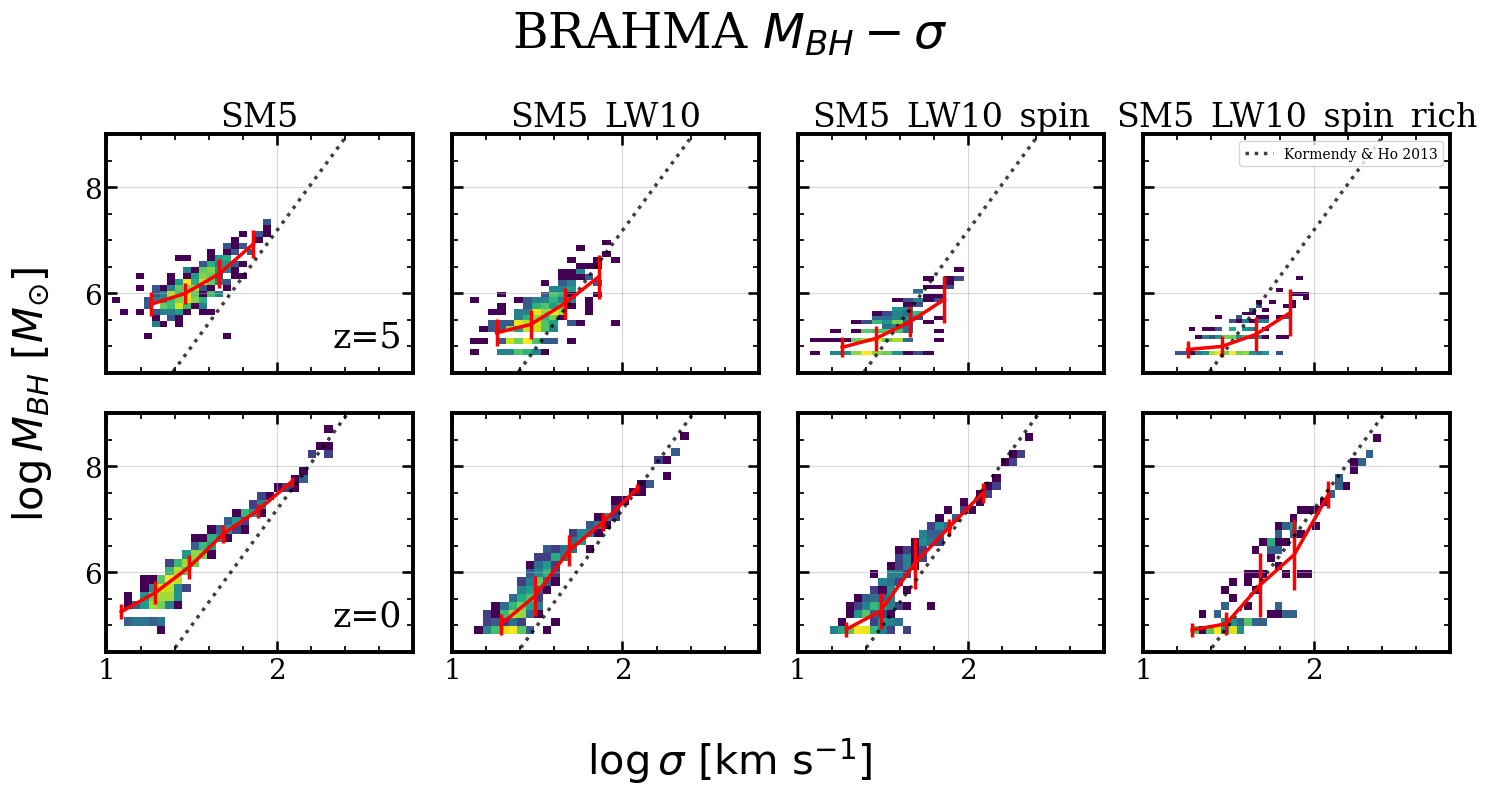

In [58]:
f,axs = plt.subplots(2,4,sharey = True,sharex = True,figsize = (15,8))



counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(np.log10(Sigma_bulge_bFOFz5[~np.isnan(Sigma_bulge_bFOFz5) & ~(Sigma_bulge_bFOFz5==0)])-np.log10(np.sqrt(3)),
                                                 np.log10(MBH_decomp_bFOFz5[~np.isnan(Sigma_bulge_bFOFz5) & ~(Sigma_bulge_bFOFz5==0)]),norm='log',bins=(20,20))
counts2, xedges2, yedges2, im2 = axs[0,1].hist2d(np.log10(Sigma_bulge_LW10z5[~np.isnan(Sigma_bulge_LW10z5) & ~(Sigma_bulge_LW10z5==0)])-np.log10(np.sqrt(3)),
                                                 np.log10(MBH_decomp_LW10z5[~np.isnan(Sigma_bulge_LW10z5) & ~(Sigma_bulge_LW10z5==0)]),norm='log',bins=(20,20))
counts3, xedges3, yedges3, im3 = axs[0,2].hist2d(np.log10(Sigma_bulge_spinz5[~np.isnan(Sigma_bulge_spinz5) & ~(Sigma_bulge_spinz5==0)])-np.log10(np.sqrt(3)),
                                                 np.log10(MBH_decomp_spinz5[~np.isnan(Sigma_bulge_spinz5) & ~(Sigma_bulge_spinz5==0)]),norm='log',bins=(20,20))
counts4, xedges4, yedges4, im4 = axs[0,3].hist2d(np.log10(Sigma_bulge_richz5[~np.isnan(Sigma_bulge_richz5) & ~(Sigma_bulge_richz5==0)])-np.log10(np.sqrt(3)),
                                                 np.log10(MBH_decomp_richz5[~np.isnan(Sigma_bulge_richz5) & ~(Sigma_bulge_richz5==0)]),norm='log',bins=(20,20))

axs[0,0].set_title('SM5')
axs[0,1].set_title('SM5_LW10')
axs[0,2].set_title('SM5_LW10_spin')
axs[0,3].set_title('SM5_LW10_spin_rich')

axs[0,0].text(0.85, 0.15, 'z=5', horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes,size=25)

counts5, xedges5, yedges5, im5 = axs[1,0].hist2d(np.log10(Sigma_bulge_bFOFz0[~np.isnan(Sigma_bulge_bFOFz0)])-np.log10(np.sqrt(3)),np.log10(MBH_decomp_bFOFz0[~np.isnan(Sigma_bulge_bFOFz0)]),norm='log',bins=(25,25))
counts6, xedges6, yedges6, im6 = axs[1,1].hist2d(np.log10(Sigma_bulge_LW10z0[~np.isnan(Sigma_bulge_LW10z0)])-np.log10(np.sqrt(3)),np.log10(MBH_decomp_LW10z0[~np.isnan(Sigma_bulge_LW10z0)]),norm='log',bins=(25,25))
counts7, xedges7, yedges7, im7 = axs[1,2].hist2d(np.log10(Sigma_bulge_spinz0[~np.isnan(Sigma_bulge_spinz0)])-np.log10(np.sqrt(3)),np.log10(MBH_decomp_spinz0[~np.isnan(Sigma_bulge_spinz0)]),norm='log',bins=(25,25))
counts8, xedges8, yedges8, im8 = axs[1,3].hist2d(np.log10(Sigma_bulge_richz0[~np.isnan(Sigma_bulge_richz0)])-np.log10(np.sqrt(3)),np.log10(MBH_decomp_richz0[~np.isnan(Sigma_bulge_richz0)]),norm='log',bins=(25,25))

axs[1,0].text(0.85, 0.15, 'z=0', horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes,size=25)


for i in range(4):
    for ii in range(2):
        axs[ii,i].errorbar(Xpoints[ii]-np.log10(np.sqrt(3)),AllBoxMeans[i,ii],yerr = AllBoxStdDevs[i,ii],color='red',lw=2.5)

f.supylabel(r'$\log M_{BH}\ [M_{\odot}]$',size=30)
f.supxlabel(r'$\log \sigma\ [\mathrm{km\ s^{-1}}]$',size=30)

for ax in axs.flatten():
    ax.grid(alpha=0.5)
    ax.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013',ls='dotted',lw=2.5,alpha=0.75,color='black')
    ax.set_xlim(1,2.8)
    ax.set_ylim(4.5,9)

axs[0,3].legend(fontsize=10,loc = 1)
    
f.suptitle(r'BRAHMA $M_{BH}-\sigma$',size=35)
f.tight_layout()

plt.savefig('Plots/Brahma_MBH_sigma_full_scatter_decomp_final_hist2d.pdf')

# Mega plot with 3 scaling relations for each simulation

### M-sigma portion:

In [22]:
# List of sigmas
Prop1list=[[Sigma_bulge_bFOFz7,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz4,Sigma_bulge_bFOFz3,
            Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz0],
          [Sigma_bulge_LW10z7,Sigma_bulge_LW10z6,Sigma_bulge_LW10z5,Sigma_bulge_LW10z4,Sigma_bulge_LW10z3,
           Sigma_bulge_LW10z2,Sigma_bulge_LW10z1,Sigma_bulge_LW10z0],
          [Sigma_bulge_spinz7,Sigma_bulge_spinz6,Sigma_bulge_spinz5,Sigma_bulge_spinz4,Sigma_bulge_spinz3,
           Sigma_bulge_spinz2,Sigma_bulge_spinz1,Sigma_bulge_spinz0],
          [Sigma_bulge_richz7,Sigma_bulge_richz6,Sigma_bulge_richz5,Sigma_bulge_richz4,Sigma_bulge_richz3,
           Sigma_bulge_richz2,Sigma_bulge_richz1,Sigma_bulge_richz0]]

# List of BH Masses
Prop2list=[[MBH_decomp_bFOFz7,MBH_decomp_bFOFz6,MBH_decomp_bFOFz5,MBH_decomp_bFOFz4,MBH_decomp_bFOFz3,MBH_decomp_bFOFz2,
            MBH_decomp_bFOFz1,MBH_decomp_bFOFz0],
           [MBH_decomp_LW10z7,MBH_decomp_LW10z6,MBH_decomp_LW10z5,MBH_decomp_LW10z4,MBH_decomp_LW10z3,MBH_decomp_LW10z2,
            MBH_decomp_LW10z1,MBH_decomp_LW10z0],
           [MBH_decomp_spinz7,MBH_decomp_spinz6,MBH_decomp_spinz5,MBH_decomp_spinz4,MBH_decomp_spinz3,MBH_decomp_spinz2,
            MBH_decomp_spinz1,MBH_decomp_spinz0],
           [MBH_decomp_richz7,MBH_decomp_richz6,MBH_decomp_richz5,MBH_decomp_richz4,MBH_decomp_richz3,MBH_decomp_richz2,
            MBH_decomp_richz1,MBH_decomp_richz0]]

# Limits for making plot in log space
limits=[1,2.4]

In [23]:
redshifts=[7,6,5,4,3,2,1,0]
MsigmaMeans,MsigmaStdDevs,MsigmaXpoints = mean_trends_adj(Prop1list,Prop2list,redshifts,limits,bins=8)

/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis.py:280: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis.py:281: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]


In [ ]:
# Binning as above for Illustris and Illustris TNG
Sigma_Illz0 = np.array(Illz0[4])[:,0]
Sigma_TNGz0 = np.array(TNGz0[4])[:,0]

Sigma_Illz5 = np.array(Illz5[4])[:,0]
Sigma_TNGz5 = np.array(TNGz5[4])[:,0]

IllProp1 = [[Sigma_Illz5,Sigma_Illz0],[Sigma_TNGz5,Sigma_TNGz0]]
IllProp2 = [[np.array(Illz5[0]),np.array(Illz0[0])],[np.array(TNGz5[0]),np.array(TNGz0[0])]]

redshiftIll = [5,0]
limitsTNG=[0.6,2.7]
Msigma_TNG_means,Msigma_TNG_StdDevs,Msigma_TNG_Xpoints = mean_trends(IllProp1,IllProp2,redshiftIll,limitsTNG,bins=10)

### M-Mstar portion

In [10]:
# List of stellar masses
Prop1list=[[Mstar_decomp_bFOFz7,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz4,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz2,
           Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz0],
           
           [Mstar_decomp_LW10z7,Mstar_decomp_LW10z6,Mstar_decomp_LW10z5,Mstar_decomp_LW10z4,Mstar_decomp_LW10z3,Mstar_decomp_LW10z2,
            Mstar_decomp_LW10z1,Mstar_decomp_LW10z0],
           
           [Mstar_decomp_spinz7,Mstar_decomp_spinz6,Mstar_decomp_spinz5,Mstar_decomp_spinz4,Mstar_decomp_spinz3,Mstar_decomp_spinz2,
            Mstar_decomp_spinz1,Mstar_decomp_spinz0],
           
           [Mstar_decomp_richz7,Mstar_decomp_richz6,Mstar_decomp_richz5,Mstar_decomp_richz4,Mstar_decomp_richz3,Mstar_decomp_richz2,
            Mstar_decomp_richz1,Mstar_decomp_richz0]]

# List of BH Masses
Prop2list=[[MBH_decomp_bFOFz7,MBH_decomp_bFOFz6,MBH_decomp_bFOFz5,MBH_decomp_bFOFz4,MBH_decomp_bFOFz3,MBH_decomp_bFOFz2,
            MBH_decomp_bFOFz1,MBH_decomp_bFOFz0],
           [MBH_decomp_LW10z7,MBH_decomp_LW10z6,MBH_decomp_LW10z5,MBH_decomp_LW10z4,MBH_decomp_LW10z3,MBH_decomp_LW10z2,
            MBH_decomp_LW10z1,MBH_decomp_LW10z0],
           [MBH_decomp_spinz7,MBH_decomp_spinz6,MBH_decomp_spinz5,MBH_decomp_spinz4,MBH_decomp_spinz3,MBH_decomp_spinz2,
            MBH_decomp_spinz1,MBH_decomp_spinz0],
           [MBH_decomp_richz7,MBH_decomp_richz6,MBH_decomp_richz5,MBH_decomp_richz4,MBH_decomp_richz3,MBH_decomp_richz2,
            MBH_decomp_richz1,MBH_decomp_richz0]]

# Limits for making plot in log space
limitsMstar=[6.4,11.5]

In [11]:
redshifts=[7,6,5,4,3,2,1,0]
MMstarMeans,MMstarStdDevs,MMstarXpoints = mean_trends_adj(Prop1list,Prop2list,redshifts,limitsMstar,bins=10)

In [ ]:
# Binning as above for Illustris and Illustris TNG
MStar_Illz0 = [np.sum(Illz0[2][i]) for i in range(len(Illz0[2]))]
MStar_TNGz0 = [np.sum(TNGz0[2][i]) for i in range(len(TNGz0[2]))]

MStar_Illz5 = [np.sum(Illz5[2][i]) for i in range(len(Illz5[2]))]
MStar_TNGz5 = [np.sum(TNGz5[2][i]) for i in range(len(TNGz5[2]))]

IllProp1 = [[np.array(MStar_Illz5),np.array(MStar_Illz0)],[np.array(MStar_TNGz5),np.array(MStar_TNGz0)]]
IllProp2 = [[np.array(Illz5[0]),np.array(Illz0[0])],[np.array(TNGz5[0]),np.array(TNGz0[0])]]

redshiftIll = [5,0]
limitsMstarTNG=[6.4,12.3]
MMstar_TNG_means,MMstar_TNG_StdDevs,MMstar_TNG_Xpoints = mean_trends(IllProp1,IllProp2,redshiftIll,limitsMstarTNG,bins=10)

### Mstar - sigma portion:

In [12]:
# List of sigmas
Prop1list=[[Sigma_bulge_bFOFz7,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz4,Sigma_bulge_bFOFz3,
            Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz0],
          [Sigma_bulge_LW10z7,Sigma_bulge_LW10z6,Sigma_bulge_LW10z5,Sigma_bulge_LW10z4,Sigma_bulge_LW10z3,
           Sigma_bulge_LW10z2,Sigma_bulge_LW10z1,Sigma_bulge_LW10z0],
          [Sigma_bulge_spinz7,Sigma_bulge_spinz6,Sigma_bulge_spinz5,Sigma_bulge_spinz4,Sigma_bulge_spinz3,
           Sigma_bulge_spinz2,Sigma_bulge_spinz1,Sigma_bulge_spinz0],
          [Sigma_bulge_richz7,Sigma_bulge_richz6,Sigma_bulge_richz5,Sigma_bulge_richz4,Sigma_bulge_richz3,
           Sigma_bulge_richz2,Sigma_bulge_richz1,Sigma_bulge_richz0]]

# List of stellar masses
Prop2list=[[Mstar_decomp_bFOFz7,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz4,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz2,
           Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz0],
           
           [Mstar_decomp_LW10z7,Mstar_decomp_LW10z6,Mstar_decomp_LW10z5,Mstar_decomp_LW10z4,Mstar_decomp_LW10z3,Mstar_decomp_LW10z2,
            Mstar_decomp_LW10z1,Mstar_decomp_LW10z0],
           
           [Mstar_decomp_spinz7,Mstar_decomp_spinz6,Mstar_decomp_spinz5,Mstar_decomp_spinz4,Mstar_decomp_spinz3,Mstar_decomp_spinz2,
            Mstar_decomp_spinz1,Mstar_decomp_spinz0],
           
           [Mstar_decomp_richz7,Mstar_decomp_richz6,Mstar_decomp_richz5,Mstar_decomp_richz4,Mstar_decomp_richz3,Mstar_decomp_richz2,
            Mstar_decomp_richz1,Mstar_decomp_richz0]]

# Limits for making plot in log space
limits=[1,2.4]

In [ ]:
redshifts=[7,6,5,4,3,2,1,0]
MstarsigmaMeans,MstarsigmaStdDevs,MstarsigmaXpoints = mean_trends_adj(Prop1list,Prop2list,redshifts,limits,bins=10)

In [ ]:
# Binning as above for Illustris and Illustris TNG
Sigma_Illz0 = np.array(Illz0[4])[:,0]
Sigma_TNGz0 = np.array(TNGz0[4])[:,0]
Sigma_Illz5 = np.array(Illz5[4])[:,0]
Sigma_TNGz5 = np.array(TNGz5[4])[:,0]

MStar_Illz0 = [np.sum(Illz0[2][i]) for i in range(len(Illz0[2]))]
MStar_TNgz0 = [np.sum(TNGz0[2][i]) for i in range(len(TNGz0[2]))]
MStar_Illz5 = [np.sum(Illz5[2][i]) for i in range(len(Illz5[2]))]
MStar_TNgz5 = [np.sum(TNGz5[2][i]) for i in range(len(TNGz5[2]))]

IllProp2 = [[np.array(MStar_Illz5),np.array(MStar_Illz0)],[np.array(MStar_TNgz5),np.array(MStar_TNgz0)]]
IllProp1 = [[Sigma_Illz5,Sigma_Illz0],[Sigma_TNGz5,Sigma_TNGz0]]

redshiftIll = [5,0]

Mstarsigma_TNG_means,Mstarsigma_TNG_StdDevs,Mstarsigma_TNG_Xpoints = mean_trends(IllProp1,IllProp2,redshiftIll,limitsTNG,bins=10)


### Now plotting:

In [ ]:
legend_names = ['z=7','z=6','z=5','z=4','z=3','z=2','z=1','z=0',]
cmap = plt.get_cmap('viridis')
axislabels = ['$Log_{10}\ \sigma_x [km\ s^{-1}]$','$Log_{10}\ M_{*} [M_{\odot}]$ ']
titles=['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH','Illustris/TNG']
label_font_size=45

fig,axs = plt.subplots(3,5,figsize = (30,15))
    
zs = np.abs(7 - np.array([5,3,1,0]))

# Plotting M-sigma: MsigmaMeans,MsigmaStdDevs,MsigmaXpoints

for i in range(4):
    for ii in range(len(zs)): # Only selecting z = 5,3,1,0
        axs[0,i].errorbar(MsigmaXpoints[zs[ii]],MsigmaMeans[i,zs[ii]],yerr = MsigmaStdDevs[i,zs[ii]],
                                  label=legend_names[zs[ii]],color = cmap(0.85 - ii*(1/4.3)),lw=2.5)
    axs[0,i].plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.75,color='black')#,label = 'Kormendy & Ho 2013')
    axs[0,i].scatter(Maiolino_x,Maiolino_y,color='purple',s=30)#,label='Maiolino et al 2024')
    axs[0,i].set_xlim(0.6,3.0)
    axs[0,i].set_ylim(4.7,10)
    axs[0,i].grid(alpha=0.5)
    axs[0,i].set_title(titles[i])
    if i == 0:
        handles, labels = axs[0,0].get_legend_handles_labels()

# Plotting M-Mstar: MMstarMeans,MMstarStdDevs,MMstarXpoints

for i in range(4):
    for ii in range(len(zs)): # Only selecting z = 5,3,1,0
        axs[1,i].errorbar(MMstarXpoints[zs[ii]],MMstarMeans[i,zs[ii]],yerr = MMstarStdDevs[i,zs[ii]],
                                  label=legend_names[zs[ii]],color = cmap(0.85 - ii*(1/4.3)),lw=2.5)
    axs[1,i].plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],ls='dotted',lw=2.5,alpha=1,color='black')#,label='Kormendy & Ho 2013')
    axs[1,i].plot(xfit_Pacucchi,Pacucchi_yfit[0],ls='dashdot',lw=2.5,alpha=1,color='black')#,label='Pacucchi et al. 2023')
    axs[1,i].scatter(Maiolino_x_M_Mstar,Maiolino_y_M_Mstar,color='purple',s=30)#,label='Maiolino et al 2024')
    axs[1,i].set_xlim(5.8,12.2)
    axs[1,i].set_ylim(4.8,10)
    axs[1,i].grid(alpha=0.5)

# Plotting Mstar-sigma: MstarsigmaMeans,MstarsigmaStdDevs,MstarsigmaXpoints

for i in range(4):
    for ii in range(len(zs)): # Only selecting z = 5,3,1,0
        axs[2,i].errorbar(MstarsigmaXpoints[zs[ii]],MstarsigmaMeans[i,zs[ii]],yerr = MstarsigmaStdDevs[i,zs[ii]],
                                  label=legend_names[zs[ii]],color = cmap(0.85 - ii*(1/4.3)),lw=2.5)
    axs[2,i].set_xlim(0.5,3)
    axs[2,i].set_ylim(5.8,12)
    axs[2,i].grid(alpha=0.5)
    

fig.suptitle('Scaling Relations for Brahma, Illustris, and TNG',size = label_font_size)
fig.legend(handles, labels, loc=(0.82,0.2),title='$BRAHMA$ redshifts',edgecolor="black")
# fig.legend(handlesTNG, labelsTNG, loc=(0.81,0.23),title='Illustris, TNG redshifts',edgecolor="black")

plt.tight_layout()
plt.show()
fig.savefig("Plots/Mega_plot.pdf")

# Redshift evolution plots

## M-sigma plot:

In [33]:
sigmas = [1.5,1.75,2]
bin_width = 0.05

bFOF_sigmas = [Sigma_bulge_bFOFz0,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz3,Sigma_bulge_bFOFz4,
               Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz7]
bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
bFOF_masses = [MBH_decomp_bFOFz0,MBH_decomp_bFOFz1,MBH_decomp_bFOFz2,MBH_decomp_bFOFz3,MBH_decomp_bFOFz4,MBH_decomp_bFOFz5,
              MBH_decomp_bFOFz6,MBH_decomp_bFOFz7]
bFOF_masses=[np.log10(i) for i in bFOF_masses]

LW10_sigmas = [Sigma_bulge_LW10z0,Sigma_bulge_LW10z1,Sigma_bulge_LW10z2,Sigma_bulge_LW10z3,Sigma_bulge_LW10z4,
               Sigma_bulge_LW10z5,Sigma_bulge_LW10z6,Sigma_bulge_LW10z7]
LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
LW10_masses = [MBH_decomp_LW10z0,MBH_decomp_LW10z1,MBH_decomp_LW10z2,MBH_decomp_LW10z3,MBH_decomp_LW10z4,MBH_decomp_LW10z5,
              MBH_decomp_LW10z6,MBH_decomp_LW10z7]
LW10_masses=[np.log10(i) for i in LW10_masses]

spin_sigmas = [Sigma_bulge_spinz0,Sigma_bulge_spinz1,Sigma_bulge_spinz2,Sigma_bulge_spinz3,Sigma_bulge_spinz4,
               Sigma_bulge_spinz5,Sigma_bulge_spinz6,Sigma_bulge_spinz7]
spin_sigmas=[np.log10(i) for i in spin_sigmas]
spin_masses = [MBH_decomp_spinz0,MBH_decomp_spinz1,MBH_decomp_spinz2,MBH_decomp_spinz3,MBH_decomp_spinz4,MBH_decomp_spinz5,
              MBH_decomp_spinz6,MBH_decomp_spinz7]
spin_masses=[np.log10(i) for i in spin_masses]

rich_sigmas = [Sigma_bulge_richz0,Sigma_bulge_richz1,Sigma_bulge_richz2,Sigma_bulge_richz3,Sigma_bulge_richz4,
               Sigma_bulge_richz5,Sigma_bulge_richz6,Sigma_bulge_richz7]
rich_sigmas=[np.log10(i) for i in rich_sigmas]
rich_masses = [MBH_decomp_richz0,MBH_decomp_richz1,MBH_decomp_richz2,MBH_decomp_richz3,MBH_decomp_richz4,MBH_decomp_richz5,
              MBH_decomp_richz6,MBH_decomp_richz7]
rich_masses=[np.log10(i) for i in rich_masses]

bFOFavgs,bFOFstds = fixed_x(bFOF_sigmas,bFOF_masses,sigmas,bin_width)
LW10avgs,LW10stds = fixed_x(LW10_sigmas,LW10_masses,sigmas,bin_width)
spinavgs,spinstds = fixed_x(spin_sigmas,spin_masses,sigmas,bin_width)
richavgs,richstds = fixed_x(rich_sigmas,rich_masses,sigmas,bin_width)

/tmp/ipykernel_499466/2779072710.py:6: RuntimeWarning: divide by zero encountered in log10
  bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
/tmp/ipykernel_499466/2779072710.py:13: RuntimeWarning: divide by zero encountered in log10
  LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
/tmp/ipykernel_499466/2779072710.py:20: RuntimeWarning: divide by zero encountered in log10
  spin_sigmas=[np.log10(i) for i in spin_sigmas]
/tmp/ipykernel_499466/2779072710.py:27: RuntimeWarning: divide by zero encountered in log10
  rich_sigmas=[np.log10(i) for i in rich_sigmas]
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/c

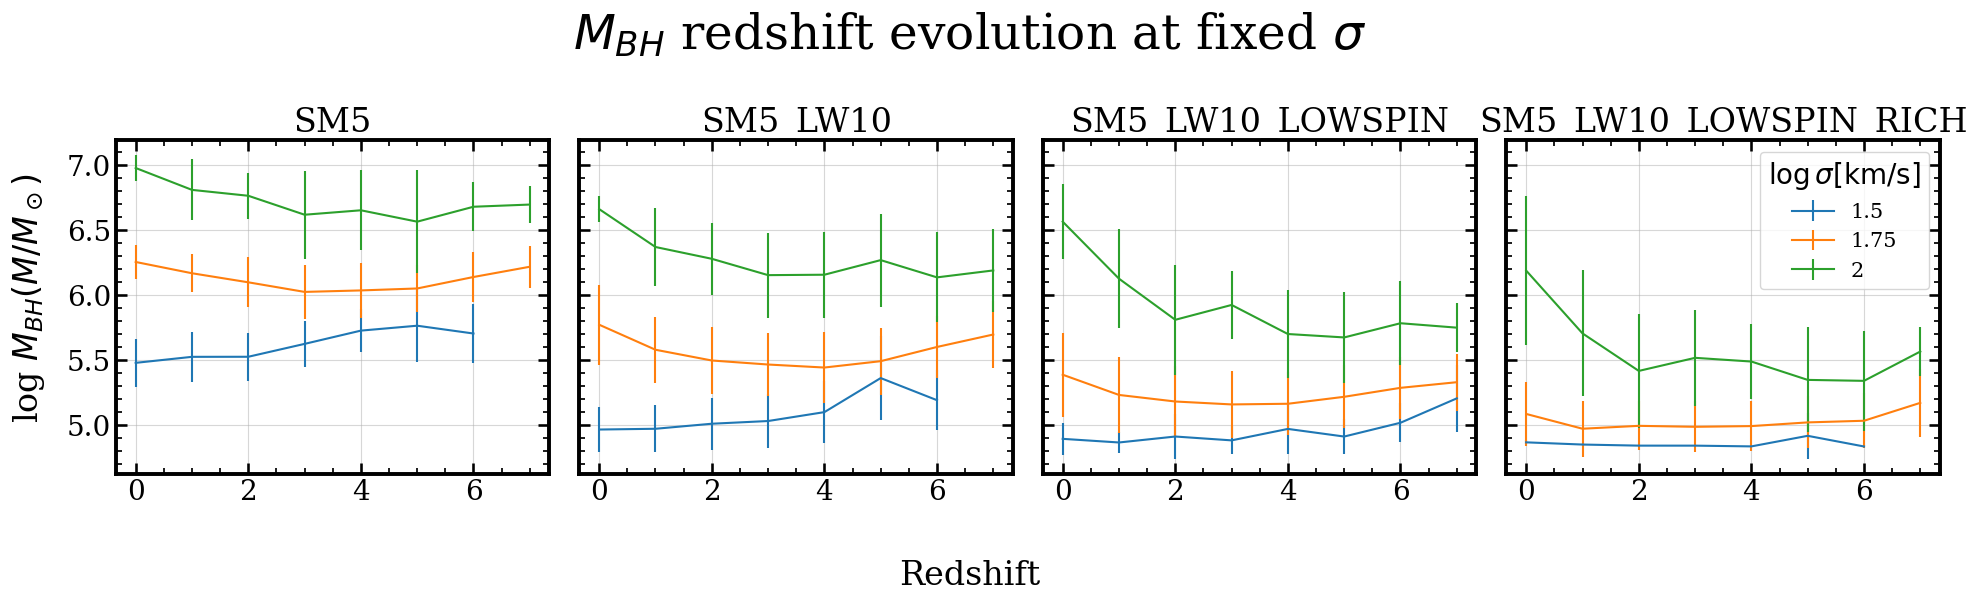

In [36]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '1.5')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 1:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '1.75')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 2:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '2')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)

fig.supxlabel('Redshift')
fig.supylabel(r'log $M_{BH} (M/M_\odot)$')
fig.suptitle(r'$M_{BH}$ redshift evolution at fixed $\sigma$',size=35)
fig.legend(title = r'$\log \sigma [\mathrm{km/s}]$',loc = (0.89,0.52),fontsize=15)

fig.tight_layout()

fig.savefig('Plots/M_Sigma_fixed_sigma.pdf')

## M-Mstar plot:

In [25]:
Mstars = [7,8,9]
bin_width = 0.15

bFOF_mstars = [Mstar_decomp_bFOFz0,Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz2,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz4,
               Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz7]
bFOF_mstars=[np.log10(i) for i in bFOF_mstars]
bFOF_masses = [MBH_decomp_bFOFz0,MBH_decomp_bFOFz1,MBH_decomp_bFOFz2,MBH_decomp_bFOFz3,MBH_decomp_bFOFz4,MBH_decomp_bFOFz5,
              MBH_decomp_bFOFz6,MBH_decomp_bFOFz7]
bFOF_masses=[np.log10(i) for i in bFOF_masses]

LW10_mstars = [Mstar_decomp_LW10z0,Mstar_decomp_LW10z1,Mstar_decomp_LW10z2,Mstar_decomp_LW10z3,Mstar_decomp_LW10z4,
              Mstar_decomp_LW10z5,Mstar_decomp_LW10z6,Mstar_decomp_LW10z7]
LW10_mstars=[np.log10(i) for i in LW10_mstars]
LW10_masses = [MBH_decomp_LW10z0,MBH_decomp_LW10z1,MBH_decomp_LW10z2,MBH_decomp_LW10z3,MBH_decomp_LW10z4,MBH_decomp_LW10z5,
              MBH_decomp_LW10z6,MBH_decomp_LW10z7]
LW10_masses=[np.log10(i) for i in LW10_masses]

spin_mstars = [Mstar_decomp_spinz0,Mstar_decomp_spinz1,Mstar_decomp_spinz2,Mstar_decomp_spinz3,Mstar_decomp_spinz4,
              Mstar_decomp_spinz5,Mstar_decomp_spinz6,Mstar_decomp_spinz7]
spin_mstars=[np.log10(i) for i in spin_mstars]
spin_masses = [MBH_decomp_spinz0,MBH_decomp_spinz1,MBH_decomp_spinz2,MBH_decomp_spinz3,MBH_decomp_spinz4,MBH_decomp_spinz5,
              MBH_decomp_spinz6,MBH_decomp_spinz7]
spin_masses=[np.log10(i) for i in spin_masses]

rich_mstars = [Mstar_decomp_richz0,Mstar_decomp_richz1,Mstar_decomp_richz2,Mstar_decomp_richz3,Mstar_decomp_richz4,
              Mstar_decomp_richz5,Mstar_decomp_richz6,Mstar_decomp_richz7]
rich_mstars=[np.log10(i) for i in rich_mstars]
rich_masses = [MBH_decomp_richz0,MBH_decomp_richz1,MBH_decomp_richz2,MBH_decomp_richz3,MBH_decomp_richz4,MBH_decomp_richz5,
              MBH_decomp_richz6,MBH_decomp_richz7]
rich_masses=[np.log10(i) for i in rich_masses]

bFOFavgs,bFOFstds = fixed_x(bFOF_mstars,bFOF_masses,Mstars,bin_width)
LW10avgs,LW10stds = fixed_x(LW10_mstars,LW10_masses,Mstars,bin_width)
spinavgs,spinstds = fixed_x(spin_mstars,spin_masses,Mstars,bin_width)
richavgs,richstds = fixed_x(rich_mstars,rich_masses,Mstars,bin_width)

/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


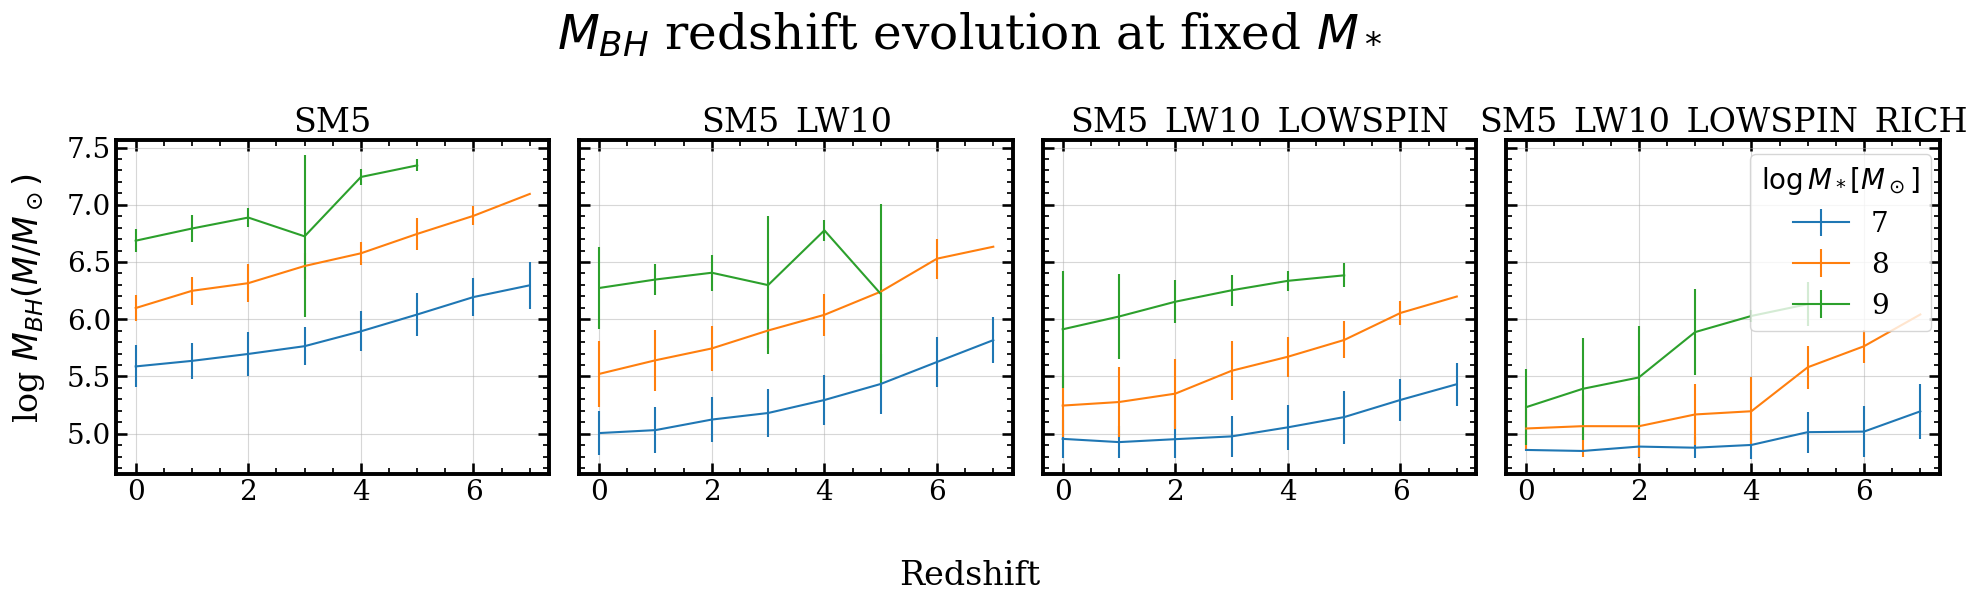

In [27]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(Mstars)):
    if i == 0:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '7')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 1:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '8')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 2:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '9')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)

fig.supxlabel('Redshift')
fig.supylabel(r'log $M_{BH} (M/M_\odot)$')
fig.suptitle(r'$M_{BH}$ redshift evolution at fixed $M_*$',size=35)
fig.legend(title = r'$\log M_* [M_\odot]$',loc = (0.885,0.45),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/M_Mstar_fixed_Mstar.pdf')

## Mstar-sigma:

In [37]:
sigmas = [1.5,1.75,2]
bin_width = 0.05

bFOF_sigmas = [Sigma_bulge_bFOFz0,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz3,Sigma_bulge_bFOFz4,
               Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz7]
bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
bFOF_mstars = [Mstar_decomp_bFOFz0,Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz2,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz4,
               Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz7]
bFOF_mstars=[np.log10(i) for i in bFOF_mstars]

LW10_sigmas = [Sigma_bulge_LW10z0,Sigma_bulge_LW10z1,Sigma_bulge_LW10z2,Sigma_bulge_LW10z3,Sigma_bulge_LW10z4,
               Sigma_bulge_LW10z5,Sigma_bulge_LW10z6,Sigma_bulge_LW10z7]
LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
LW10_mstars = [Mstar_decomp_LW10z0,Mstar_decomp_LW10z1,Mstar_decomp_LW10z2,Mstar_decomp_LW10z3,Mstar_decomp_LW10z4,
              Mstar_decomp_LW10z5,Mstar_decomp_LW10z6,Mstar_decomp_LW10z7]
LW10_mstars=[np.log10(i) for i in LW10_mstars]

spin_sigmas = [Sigma_bulge_spinz0,Sigma_bulge_spinz1,Sigma_bulge_spinz2,Sigma_bulge_spinz3,Sigma_bulge_spinz4,
               Sigma_bulge_spinz5,Sigma_bulge_spinz6,Sigma_bulge_spinz7]
spin_sigmas=[np.log10(i) for i in spin_sigmas]
spin_mstars = [Mstar_decomp_spinz0,Mstar_decomp_spinz1,Mstar_decomp_spinz2,Mstar_decomp_spinz3,Mstar_decomp_spinz4,
              Mstar_decomp_spinz5,Mstar_decomp_spinz6,Mstar_decomp_spinz7]
spin_mstars=[np.log10(i) for i in spin_mstars]

rich_sigmas = [Sigma_bulge_richz0,Sigma_bulge_richz1,Sigma_bulge_richz2,Sigma_bulge_richz3,Sigma_bulge_richz4,
               Sigma_bulge_richz5,Sigma_bulge_richz6,Sigma_bulge_richz7]
rich_sigmas=[np.log10(i) for i in rich_sigmas]
rich_mstars = [Mstar_decomp_richz0,Mstar_decomp_richz1,Mstar_decomp_richz2,Mstar_decomp_richz3,Mstar_decomp_richz4,
              Mstar_decomp_richz5,Mstar_decomp_richz6,Mstar_decomp_richz7]
rich_mstars=[np.log10(i) for i in rich_mstars]

bFOFavgs,bFOFstds = fixed_x(bFOF_sigmas,bFOF_mstars,sigmas,bin_width)
LW10avgs,LW10stds = fixed_x(LW10_sigmas,LW10_mstars,sigmas,bin_width)
spinavgs,spinstds = fixed_x(spin_sigmas,spin_mstars,sigmas,bin_width)
richavgs,richstds = fixed_x(rich_sigmas,rich_mstars,sigmas,bin_width)

/tmp/ipykernel_499466/1901182221.py:6: RuntimeWarning: divide by zero encountered in log10
  bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
/tmp/ipykernel_499466/1901182221.py:13: RuntimeWarning: divide by zero encountered in log10
  LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
/tmp/ipykernel_499466/1901182221.py:20: RuntimeWarning: divide by zero encountered in log10
  spin_sigmas=[np.log10(i) for i in spin_sigmas]
/tmp/ipykernel_499466/1901182221.py:27: RuntimeWarning: divide by zero encountered in log10
  rich_sigmas=[np.log10(i) for i in rich_sigmas]
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/c

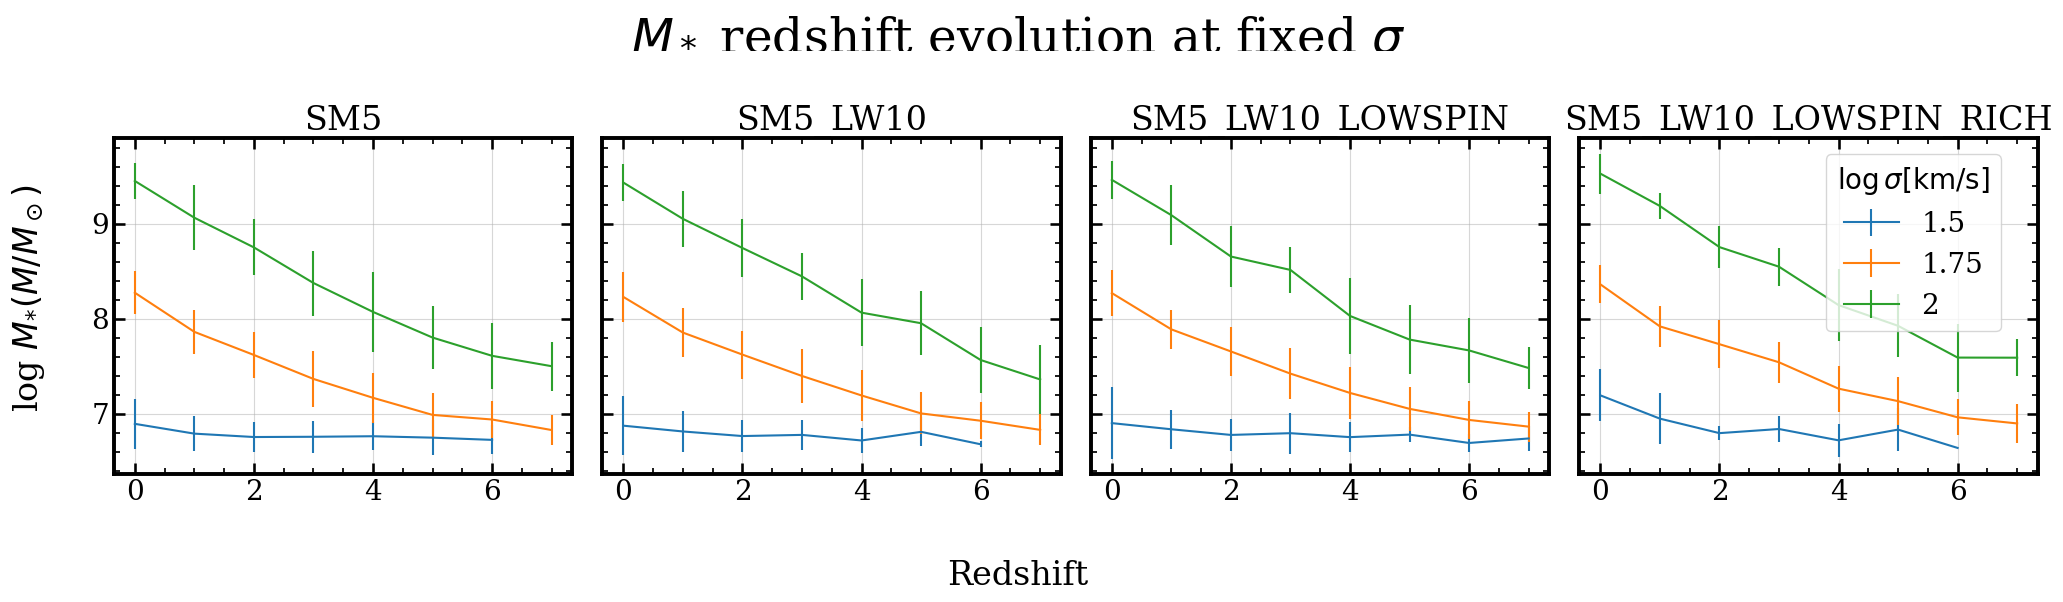

In [48]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,axs = plt.subplots(1,4,figsize = (21,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '1.5')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 1:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '1.75')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 2:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '2')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)

fig.supxlabel('Redshift')
fig.supylabel(r'log $M_{*} (M/M_\odot)$')
fig.suptitle(r'$M_*$ redshift evolution at fixed $\sigma$',size=35)
fig.legend(title = r'$\log \sigma [\mathrm{km/s}]$',loc = (0.885,0.45),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/Mstar_sigma_fixed_sigma.pdf', bbox_inches='tight')

## HMR plot

In [49]:
bFOF_HMR_z0 = bFOF_decomp_z0[10]
bFOF_HMR_z1 = bFOF_decomp_z1[10]
bFOF_HMR_z2 = bFOF_decomp_z2[10]
bFOF_HMR_z3 = bFOF_decomp_z3[10]
bFOF_HMR_z4 = bFOF_decomp_z4[10]
bFOF_HMR_z5 = bFOF_decomp_z5[10]
bFOF_HMR_z6 = bFOF_decomp_z6[10]
bFOF_HMR_z7 = bFOF_decomp_z7[10]

In [50]:
a = np.array([1/(1+z) for z in np.arange(0,8,1)]) # For redshift z=0 to z=7

HMR_z0 = np.array(bFOF_HMR_z0)*a[0]/h
HMR_z1 = np.array(bFOF_HMR_z1)*a[1]/h
HMR_z2 = np.array(bFOF_HMR_z2)*a[2]/h
HMR_z3 = np.array(bFOF_HMR_z3)*a[3]/h
HMR_z4 = np.array(bFOF_HMR_z4)*a[4]/h
HMR_z5 = np.array(bFOF_HMR_z5)*a[5]/h
HMR_z6 = np.array(bFOF_HMR_z6)*a[6]/h
HMR_z7 = np.array(bFOF_HMR_z7)*a[7]/h

In [51]:
mstars = [7,8,9]
bin_width = 0.1

bFOF_mstars = [np.log10(Mstar_decomp_bFOFz0),np.log10(Mstar_decomp_bFOFz1),np.log10(Mstar_decomp_bFOFz2),np.log10(Mstar_decomp_bFOFz3),
                np.log10(Mstar_decomp_bFOFz4),np.log10(Mstar_decomp_bFOFz5),np.log10(Mstar_decomp_bFOFz6),np.log10(Mstar_decomp_bFOFz7)]
bFOF_HMRs = [bFOF_HMR_z0,bFOF_HMR_z1,bFOF_HMR_z2,bFOF_HMR_z3,bFOF_HMR_z4,bFOF_HMR_z5,bFOF_HMR_z6,bFOF_HMR_z7]

avgs,stds = fixed_x(bFOF_mstars,bFOF_HMRs,mstars,bin_width)

/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/yja6qa/.conda/envs/kho_env/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


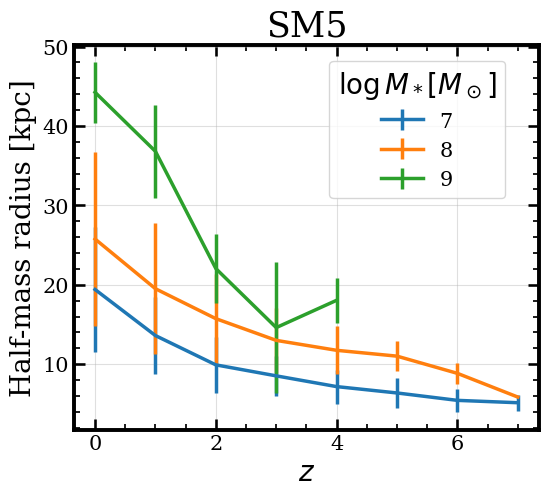

In [54]:
redshifts=[0,1,2,3,4,5,6,7]
labels = [7,8,9]

fig,ax = plt.subplots(figsize = (6,5))

for i in range(3):
    ax.errorbar(redshifts,avgs[i],stds[i],label=labels[i],lw=2.5)
 
fig.legend(title=r'$\log M_* [M_\odot]$',fontsize=15,loc=(0.6,0.6))
ax.set_ylabel(r'Half-mass radius [kpc]',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_title(r'SM5',size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid(alpha=0.4)

plt.savefig('Plots/SM5_HMR_redshift_evol.pdf')

# M-Sigma comparison plot